In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import preprocessing

In [2]:
df_train = pd.read_excel("train_agriculture .xlsx")
df_test = pd.read_excel("test_agriculture.xlsx")

In [3]:
df_train

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [4]:
df_test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [5]:
df_train.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [6]:
df_test.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

# EDA

In [7]:
big_df=df_train.append(df_test, sort=False)

In [8]:
big_df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0.0
1,F00000003,209,1,0,1,0,0.0,0,2,1.0
2,F00000004,257,1,0,1,0,0.0,0,2,1.0
3,F00000005,257,1,1,1,0,0.0,0,2,1.0
4,F00000006,342,1,0,1,0,0.0,0,2,1.0
...,...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3,NaN
1195,F00003135,1132,0,1,2,40,25.0,3,1,NaN
1196,F00003138,1132,0,1,2,20,13.0,23,1,NaN
1197,F00003149,1212,0,1,2,10,35.0,5,1,NaN


In [9]:
big_df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                float64
dtype: object

In [10]:
big_df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used           561
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
dtype: int64

In [11]:
big_df['Number_Weeks_Used'].fillna(big_df['Number_Weeks_Used'].mode()[0], inplace=True)

In [12]:
big_df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used             0
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
dtype: int64

In [13]:
big_df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                float64
dtype: object

In [14]:
label_encoder = preprocessing.LabelEncoder()

In [15]:
big_df['ID']=label_encoder.fit_transform(big_df['ID'])

In [16]:
big_df.dtypes

ID                           int64
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                float64
dtype: object

In [17]:
big_df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,0,188,1,0,1,0,0.0,0,1,0.0
1,2,209,1,0,1,0,0.0,0,2,1.0
2,3,257,1,0,1,0,0.0,0,2,1.0
3,4,257,1,1,1,0,0.0,0,2,1.0
4,5,342,1,0,1,0,0.0,0,2,1.0
...,...,...,...,...,...,...,...,...,...,...
1194,2996,1132,0,1,2,40,34.0,7,3,NaN
1195,2997,1132,0,1,2,40,25.0,3,1,NaN
1196,3000,1132,0,1,2,20,13.0,23,1,NaN
1197,3009,1212,0,1,2,10,35.0,5,1,NaN


In [18]:
big_df.describe()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,5798.000000,4599.000000
mean,2898.500000,1347.643153,0.218524,0.472232,2.304243,26.493618,28.057261,8.760262,1.891687,0.194390
std,1673.882762,821.330403,0.413280,0.499271,0.484594,15.655508,12.285552,9.582781,0.692997,0.454597
min,0.000000,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1449.250000,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,2898.500000,1132.000000,0.000000,0.000000,2.000000,20.000000,26.000000,6.000000,2.000000,0.000000
75%,4347.750000,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,15.000000,2.000000,0.000000
max,5797.000000,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [19]:
big_df.skew()

ID                         0.000000
Estimated_Insects_Count    0.948378
Crop_Type                  1.362628
Soil_Type                  0.111273
Pesticide_Use_Category     0.543183
Number_Doses_Week          0.929452
Number_Weeks_Used          0.422264
Number_Weeks_Quit          0.972163
Season                     0.147252
Crop_Damage                2.306933
dtype: float64

In [20]:
big_df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,0,188,1,0,1,0,0.0,0,1,0.0
1,2,209,1,0,1,0,0.0,0,2,1.0
2,3,257,1,0,1,0,0.0,0,2,1.0
3,4,257,1,1,1,0,0.0,0,2,1.0
4,5,342,1,0,1,0,0.0,0,2,1.0
...,...,...,...,...,...,...,...,...,...,...
1194,2996,1132,0,1,2,40,34.0,7,3,NaN
1195,2997,1132,0,1,2,40,25.0,3,1,NaN
1196,3000,1132,0,1,2,20,13.0,23,1,NaN
1197,3009,1212,0,1,2,10,35.0,5,1,NaN


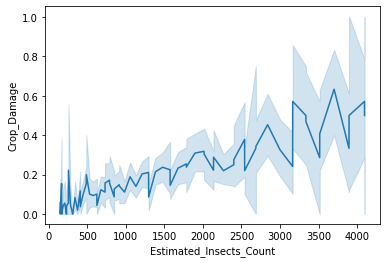

In [21]:
sns.lineplot(x="Estimated_Insects_Count",y="Crop_Damage",data=big_df)
plt.show()

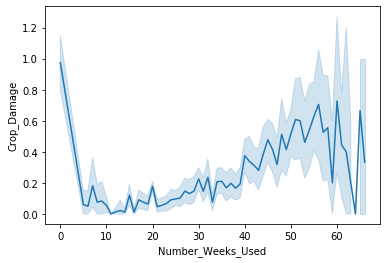

In [22]:
sns.lineplot(x="Number_Weeks_Used",y="Crop_Damage",data=big_df)
plt.show()

In [23]:
big_df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,0,188,1,0,1,0,0.0,0,1,0.0
1,2,209,1,0,1,0,0.0,0,2,1.0
2,3,257,1,0,1,0,0.0,0,2,1.0
3,4,257,1,1,1,0,0.0,0,2,1.0
4,5,342,1,0,1,0,0.0,0,2,1.0
...,...,...,...,...,...,...,...,...,...,...
1194,2996,1132,0,1,2,40,34.0,7,3,NaN
1195,2997,1132,0,1,2,40,25.0,3,1,NaN
1196,3000,1132,0,1,2,20,13.0,23,1,NaN
1197,3009,1212,0,1,2,10,35.0,5,1,NaN


In [24]:
train_df = big_df[0:4599]
test_df = big_df[4599:]
test_df = test_df.drop(['Crop_Damage'], axis =1)

In [25]:
train_df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,0,188,1,0,1,0,0.0,0,1,0.0
1,2,209,1,0,1,0,0.0,0,2,1.0
2,3,257,1,0,1,0,0.0,0,2,1.0
3,4,257,1,1,1,0,0.0,0,2,1.0
4,5,342,1,0,1,0,0.0,0,2,1.0
...,...,...,...,...,...,...,...,...,...,...
4594,5793,2138,0,1,2,20,20.0,1,1,1.0
4595,5794,2139,0,1,2,30,47.0,2,1,1.0
4596,5795,2267,0,1,2,10,7.0,27,2,0.0
4597,5796,2267,0,1,2,10,20.0,24,2,0.0


In [26]:
test_df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,1,188,1,1,1,0,20.0,0,2
1,6,410,1,1,1,0,0.0,0,2
2,10,626,1,0,1,0,0.0,0,2
3,12,731,1,0,1,0,0.0,0,2
4,13,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,2996,1132,0,1,2,40,34.0,7,3
1195,2997,1132,0,1,2,40,25.0,3,1
1196,3000,1132,0,1,2,20,13.0,23,1
1197,3009,1212,0,1,2,10,35.0,5,1


In [27]:
x = train_df.drop(['Crop_Damage'], axis=1)
y = train_df['Crop_Damage']

In [28]:
x

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0,188,1,0,1,0,0.0,0,1
1,2,209,1,0,1,0,0.0,0,2
2,3,257,1,0,1,0,0.0,0,2
3,4,257,1,1,1,0,0.0,0,2
4,5,342,1,0,1,0,0.0,0,2
...,...,...,...,...,...,...,...,...,...
4594,5793,2138,0,1,2,20,20.0,1,1
4595,5794,2139,0,1,2,30,47.0,2,1
4596,5795,2267,0,1,2,10,7.0,27,2
4597,5796,2267,0,1,2,10,20.0,24,2


In [29]:
y

0       0.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4594    1.0
4595    1.0
4596    0.0
4597    0.0
4598    0.0
Name: Crop_Damage, Length: 4599, dtype: float64

# Modelling

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40,stratify=y)

In [49]:
print(x_train.shape,x_test.shape)

(3219, 9) (1380, 9)


In [50]:
print(y_train.shape,y_test.shape)

(3219,) (1380,)


In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [52]:
KNN=KNeighborsClassifier(n_neighbors=10)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=20)
GNB=GaussianNB()
RF=RandomForestClassifier()

In [53]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RF))

In [54]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

**************************** KNeighborsClassifier ********************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


Accuracy score =  0.8173913043478261


Cross_val_Score =  0.36741159190158085


classification_report
               precision    recall  f1-score   support

         0.0       0.84      0.97      0.90      1146
         1.0       0.29      0.09      0.13       199
         2.0       0.00      0.00      0.00        35

    accuracy                           0.82      1380
   macro avg       0.38      0.35      0.34      1380
weighted avg       0.74      0.82      0.77      1380



[[1111   35    0]
 [ 182   17    0]
 [  29    6    0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



**************************** SVC ********************************




/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


Accuracy score =  0.8311594202898551




/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/vishaln/opt/anaconda3/lib/pyth

Cross_val_Score =  0.8304009799503861


classification_report
               precision    recall  f1-score   support

         0.0       0.83      1.00      0.91      1146
         1.0       1.00      0.01      0.01       199
         2.0       0.00      0.00      0.00        35

    accuracy                           0.83      1380
   macro avg       0.61      0.34      0.31      1380
weighted avg       0.83      0.83      0.76      1380



[[1146    0    0]
 [ 198    1    0]
 [  35    0    0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



**************************** LogisticRegression ********************************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy score =  0.827536231884058




/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vishaln/opt/anaconda3/lib/python3.

Cross_val_Score =  0.812591348442717


classification_report
               precision    recall  f1-score   support

         0.0       0.84      0.99      0.91      1146
         1.0       0.40      0.05      0.09       199
         2.0       0.00      0.00      0.00        35

    accuracy                           0.83      1380
   macro avg       0.41      0.35      0.33      1380
weighted avg       0.75      0.83      0.76      1380



[[1132   14    0]
 [ 189   10    0]
 [  34    1    0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



**************************** DecisionTreeClassifier ********************************


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                   

/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Cross_val_Score =  0.3655335081101928


classification_report
               precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      1146
         1.0       0.40      0.16      0.23       199
         2.0       0.09      0.03      0.04        35

    accuracy                           0.82      1380
   macro avg       0.45      0.38      0.39      1380
weighted avg       0.77      0.82      0.78      1380



[[1099   40    7]
 [ 164   32    3]
 [  25    9    1]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)





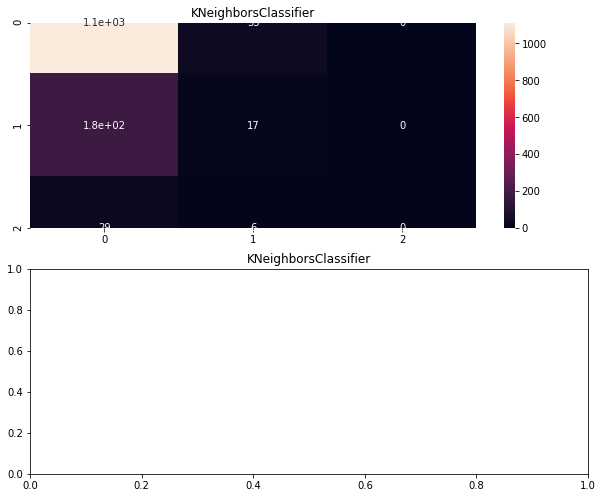

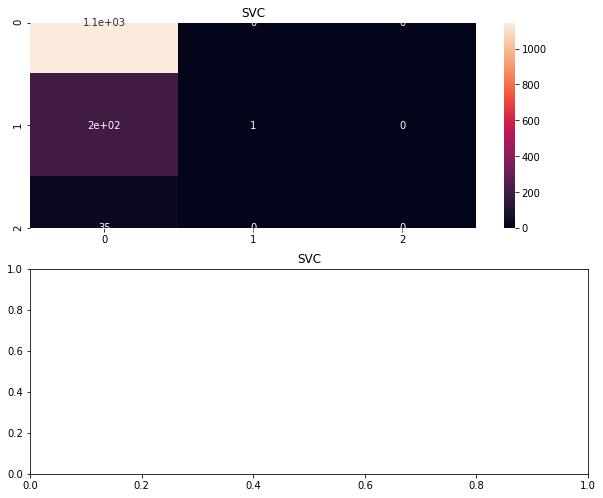

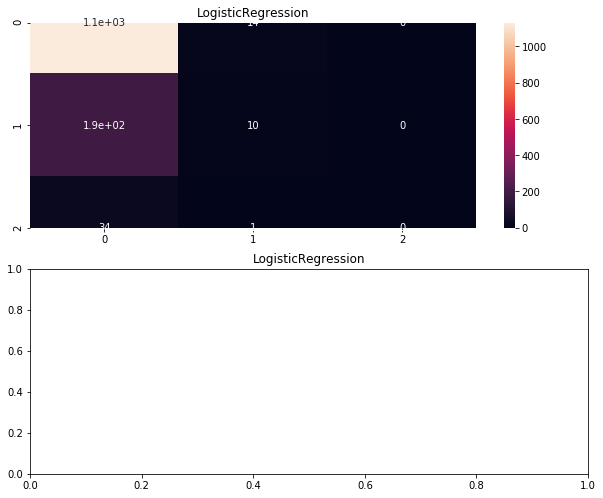

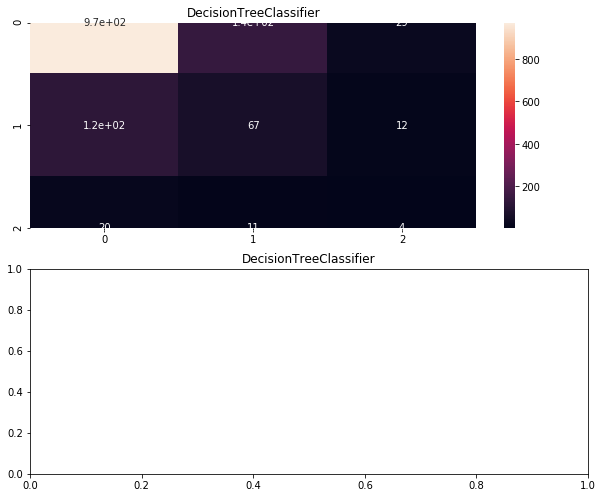

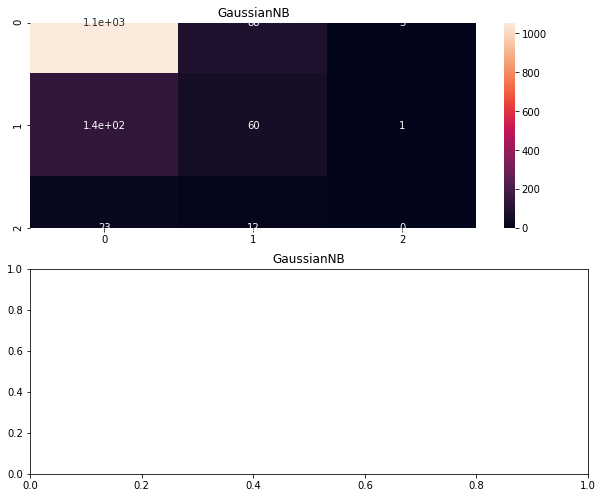

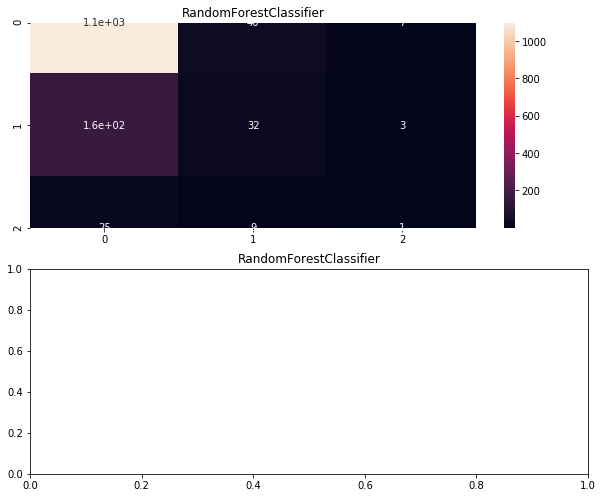

In [55]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('****************************',name,'********************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train.values.ravel())
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score = ', AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_Score = ', sc)
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    print('\n\n')

In [56]:
result=pd.DataFrame({'Model': Model, 'Accuracy_score': score, 'Cross_val_score':cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,81.739130,36.741159
1,SVC,83.115942,83.040098
2,LogisticRegression,82.753623,81.259135
3,DecisionTreeClassifier,75.652174,25.913892
4,GaussianNB,80.797101,73.332680
5,RandomForestClassifier,82.028986,36.553351


# Model Selection